In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')


In [4]:
df=pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [6]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [7]:
df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [8]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [18]:
df.set_index('PassengerId' ,inplace=True)

In [20]:
df.drop('Name' , axis=1 ,inplace=True)
df

KeyError: "['Name'] not found in axis"

In [21]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,female,35.0,1,0,113803,53.1000,C123,S
5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,female,19.0,0,0,112053,30.0000,B42,S
889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [25]:
corr=df['Fare'].corr(df['SibSp'])
print(f'correlation between fare and SibSp = {corr} ')

correlation between fare and SibSp = 0.1596510432421609 


In [42]:
df['Sex'].replace('female', 0 ,inplace=True)
df['Sex'].replace('male', 1,inplace=True)

In [43]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,0,35.0,1,0,113803,53.1000,C123,S
5,0,3,1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,1,27.0,0,0,211536,13.0000,NaN,S
888,1,1,0,19.0,0,0,112053,30.0000,B42,S
889,0,3,0,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [44]:
from sklearn.preprocessing import LabelEncoder
Ticket_le=LabelEncoder()
Cabin_le=LabelEncoder()
Embarked=LabelEncoder()


In [46]:
df['Ticket']=Ticket_le.fit_transform(df['Ticket'])
df['Cabin']=Cabin_le.fit_transform(df['Cabin'])
df['Embarked']=Embarked.fit_transform(df['Embarked'])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,0,3,1,22.0,1,0,523,7.2500,147,2
2,1,1,0,38.0,1,0,596,71.2833,81,0
3,1,3,0,26.0,0,0,669,7.9250,147,2
4,1,1,0,35.0,1,0,49,53.1000,55,2
5,0,3,1,35.0,0,0,472,8.0500,147,2
...,...,...,...,...,...,...,...,...,...,...
887,0,2,1,27.0,0,0,101,13.0000,147,2
888,1,1,0,19.0,0,0,14,30.0000,30,2
889,0,3,0,NaN,1,2,675,23.4500,147,2


In [51]:
df['Survived']=df['Survived'].astype('category')
df['Parch']=df['Parch'].astype('category')
df['Embarked']=df['Embarked'].astype('category')
df['Ticket']=df['Ticket'].astype('category')
df['Cabin']=df['Cabin'].astype('category')
df['Sex']=df['Sex'].astype('category')
df.describe()

,Pclass,Age,SibSp,Fare
count,891.000000,714.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,32.204208
std,0.836071,14.526497,1.102743,49.693429
min,1.000000,0.420000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,31.000000
max,3.000000,80.000000,8.000000,512.329200


In [52]:
df.isna()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
887,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False,False
889,False,False,False,True,False,False,False,False,False,False


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    int64   
 2   Sex       891 non-null    category
 3   Age       714 non-null    float64 
 4   SibSp     891 non-null    int64   
 5   Parch     891 non-null    category
 6   Ticket    891 non-null    category
 7   Fare      891 non-null    float64 
 8   Cabin     891 non-null    category
 9   Embarked  891 non-null    category
dtypes: category(6), float64(2), int64(2)
memory usage: 69.2 KB


In [54]:
df.shape

(891, 10)

In [62]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    int64   
 2   Sex       891 non-null    category
 3   Age       891 non-null    float64 
 4   SibSp     891 non-null    int64   
 5   Parch     891 non-null    category
 6   Ticket    891 non-null    category
 7   Fare      891 non-null    float64 
 8   Cabin     891 non-null    category
 9   Embarked  891 non-null    category
dtypes: category(6), float64(2), int64(2)
memory usage: 69.2 KB


In [70]:
df['Age'].min().sum()

0.42

In [71]:
df[df['Age']==0.42]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
804,1,3,1,0.42,0,1,174,8.5167,147,0


In [73]:
df['Age'].replace(0.42,42 ,inplace=True)

In [87]:
df.describe()

,Pclass,Age,SibSp,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.745784,0.523008,32.204208
std,0.836071,12.971392,1.102743,49.693429
min,1.000000,0.670000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,7.910400
50%,3.000000,29.699118,0.000000,14.454200
75%,3.000000,35.000000,1.000000,31.000000
max,3.000000,80.000000,8.000000,512.329200


In [95]:
filte=df['Age']<1
df[filte]
def agealt(age):
    if age < 1:
        newage=age*100
    else:
        newage = age
    return newage
df['Age']=df['Age'].apply(agealt)



In [96]:
df[filte]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,


In [97]:
df.describe()

,Pclass,Age,SibSp,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,2.308642,30.273562,0.523008,32.204208
std,0.836071,13.387141,1.102743,49.693429
min,1.000000,1.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,7.910400
50%,3.000000,29.699118,0.000000,14.454200
75%,3.000000,36.000000,1.000000,31.000000
max,3.000000,92.000000,8.000000,512.329200


In [98]:
df.astype('object').describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891,891,891,891.000000,891,891,891,891.00,891,891
unique,2,3,2,88.000000,7,7,681,248.00,148,4
top,0,3,1,29.699118,0,0,333,8.05,147,2
freq,549,491,577,177.000000,608,678,7,43.00,687,644


In [154]:
x=df.drop(['Survived', 'SibSp' ,'Parch' ,'Ticket','Cabin' ,'Embarked'],axis='columns')
y=df['Survived']

In [155]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.20 , random_state=42)

In [160]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [161]:
model.fit(x_train,y_train )

DecisionTreeClassifier()

In [162]:
model.score(x_train,y_train)

0.9789325842696629

In [163]:
model.score(x_test,y_test)

0.770949720670391

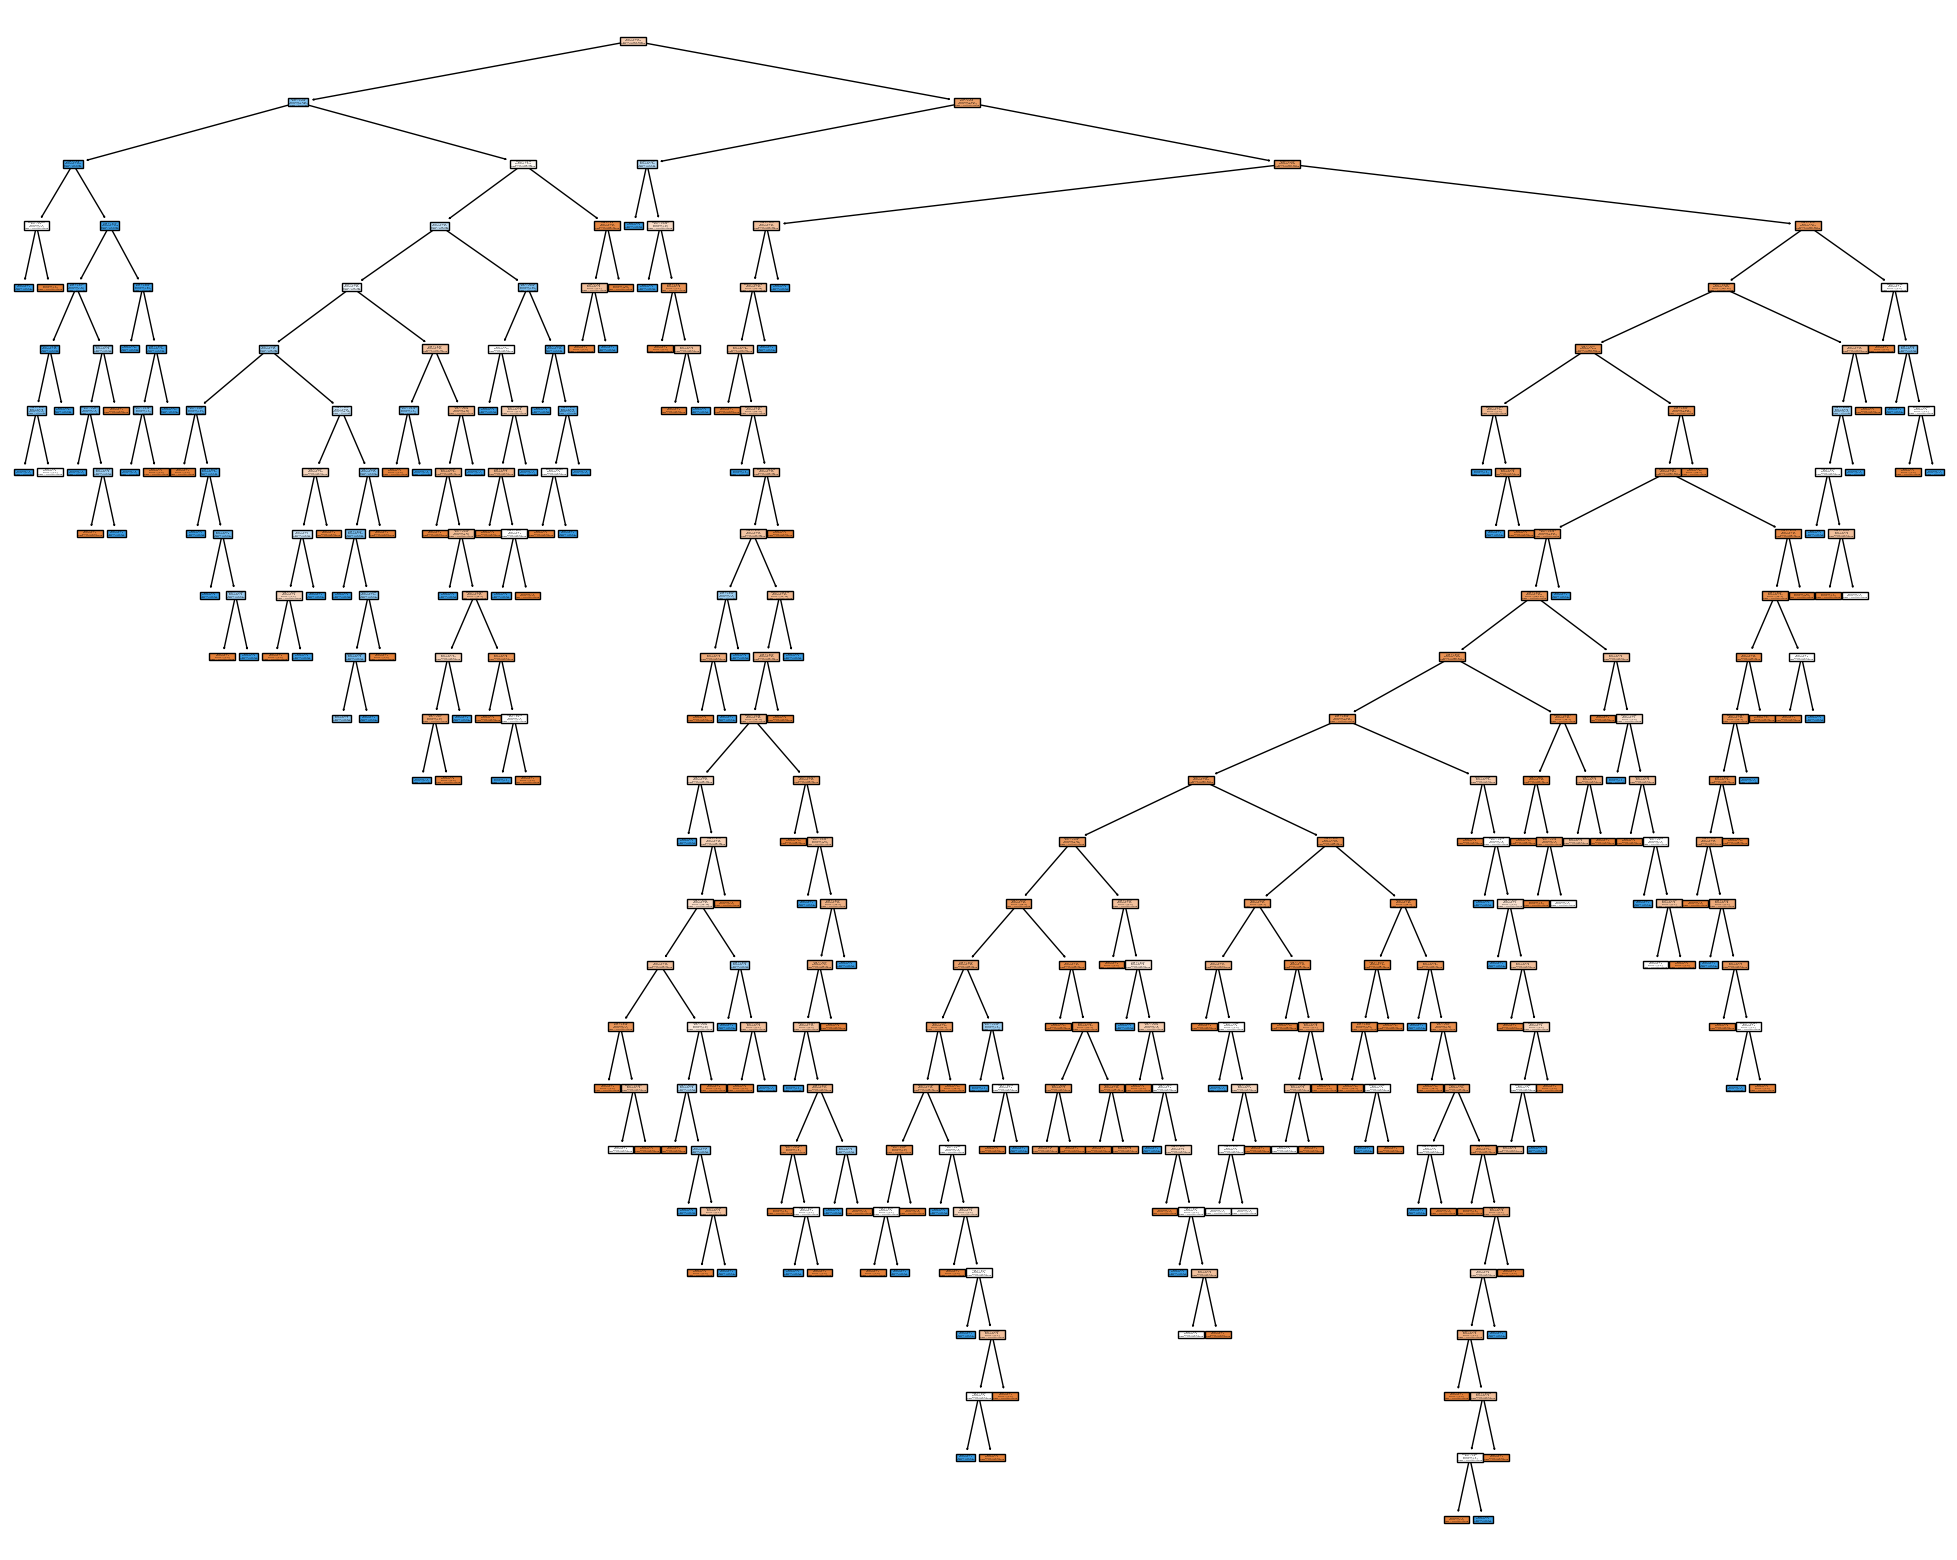

In [164]:
from sklearn import tree
def get_dt_graph(dt_classifier):
    fig = plt.figure(figsize=(25,20))
    _ = tree.plot_tree(dt_classifier,
                       feature_names=x.columns,
                       class_names=['did not survive', "survived"],
                       filled=True)
gph = get_dt_graph(model)

In [165]:
model.feature_importances_

array([0.1242578 , 0.31016717, 0.24105221, 0.32452282])